<a href="https://colab.research.google.com/github/dajopr/lectures/blob/main/image_processing/lecture_02_spatial_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OpenCV Exercise Sheet: Spatial Filtering

**Prerequisites:** Basic knowledge of Python, NumPy, OpenCV (reading/displaying/converting images), and Matplotlib.

**Goal:** This exercise sheet focuses on understanding and applying common spatial filtering techniques for image smoothing, sharpening, and edge detection using OpenCV.

---
## Introduction

Spatial filtering involves applying a kernel (a small matrix) across an image to modify pixel values based on their neighborhood. This is fundamental for tasks like noise reduction, sharpening, and feature extraction.

We will explore:
1.  **Comparing Smoothing Filters:** Evaluating Averaging, Gaussian, and Median filters for noise reduction.
2.  **Image Sharpening:** Enhancing details using the Laplacian filter and unsharp masking.

---
## Setup

Ensure you have the necessary libraries installed. You can run the following code cell in Colab:

```python
# Code Cell 1: Install Libraries (if needed)
!pip install opencv-python numpy matplotlib scikit-image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import skimage.util as sk_util
from skimage import io

In [2]:
def show_images(images, titles, rows, cols, figsize=(15, 10)):
    """Helper function to display multiple images"""
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    # Handle case where subplot returns a single Axes object
    if rows * cols == 1:
        axes = np.array([axes]) # Wrap in a NumPy array
    axes = axes.ravel() # Flatten the axes array
    plot_index = 0
    for i, img in enumerate(images):
        if plot_index < len(axes): # Ensure we don't exceed the number of axes
            current_ax = axes[plot_index]
            if img is not None:
              if len(img.shape) == 2:
                  current_ax.imshow(img, cmap='gray')
              else:
                  # Convert BGR to RGB for Matplotlib display
                  # OpenCV reads images in BGR format
                  current_ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
              current_ax.set_title(titles[i])
            else:
              current_ax.set_title(f'{titles[i]} (None)') # Handle None images
            current_ax.axis('off') # Hide axes ticks
            plot_index += 1

    # Hide any unused subplots
    for j in range(plot_index, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()



## Exercise 1 - Image blurring

### Exercise 1a – Averaging Filter

Context: Spatial filtering involves convolving an image with a small matrix called a kernel (or filter). The cv2.filter2D function allows us to apply custom kernels. A common averaging filter uses a kernel where all elements are equal and sum to 1.

Task: Define a 3x3 averaging kernel and apply it to image_gray using cv2.filter2D. Assign the result to blurred_image.

Hints:

    The 3x3 averaging kernel has all elements equal to 1/9 (so they sum to 1).

    You can create this using np.ones and dividing by the size

    Use cv2.filter2D(src, ddepth, kernel).

        src: The input image (image_gray).

        ddepth: Desired depth of the output image. Use -1 to indicate the output depth should be the same as the input (src).

        kernel: The kernel you defined.

Output/Verification: Display the blurred_image using plt.imshow(blurred_image, cmap='gray'). Compare it to image_gray – it should appear slightly blurred.
Hints:

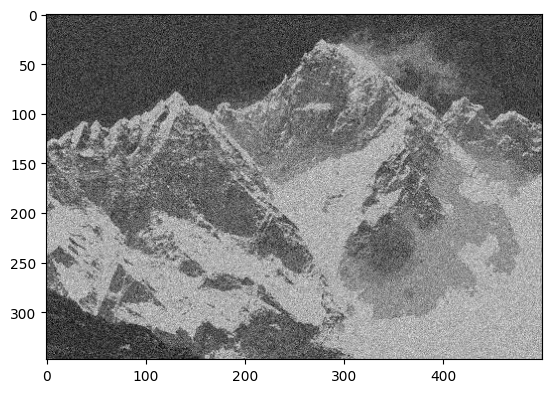

In [27]:
image_gray = io.imread("https://media.cheggcdn.com/media/22b/22b50981-307e-45c3-9cbc-a2510d71e99a/phpG6jQSX.png", as_gray=True) / 255

### Exercise 1b – Gaussian filter
Gaussian blurring is another common smoothing technique. It uses a kernel where weights decrease following a Gaussian (bell curve) distribution from the center outwards. This often produces more natural-looking blur than a simple averaging filter and is less sensitive to outliers. OpenCV provides a dedicated function for this
Task:
1. Create a 3 by 3 gaussian filter kernel using the formula $w(s, t) = K* \exp\left(-\frac{s^2 + t^2}{2\sigma^2}\right)$ and $\sigma=0.1$
2. Apply the kernel to the image and compare the results.


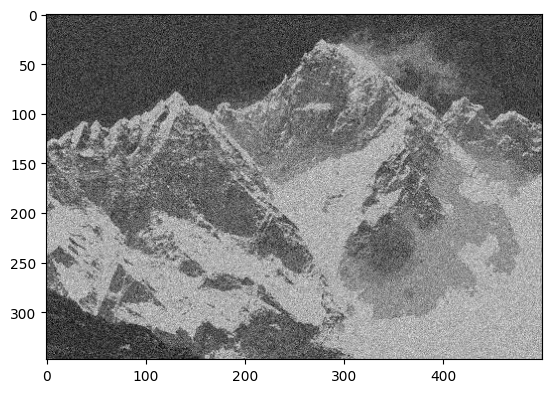

### Exercise 1c – Comparing Built-in Smoothing Filters on Noise

**Objective:** Apply different OpenCV smoothing filters (`cv2.blur`, `cv2.GaussianBlur`, `cv2.medianBlur`) to images corrupted by Gaussian noise and Salt & Pepper noise. Observe and compare their effectiveness in reducing noise while preserving image features.

**Instructions:**

1.  Create two noisy versions of the **grayscale** image (`img_gray`):
    * One with Gaussian noise (e.g., `var=0.1`).
    * One with Salt & Pepper noise (e.g., `amount=0.05`).
    * Use the provided add_noise_to_image function. Remember to work on copies of the original grayscale image.
2.  Define a kernel size for averaging and Gaussian filters (e.g., `ksize = (5, 5)`).
3.  Define a kernel size for the median filter (must be an odd integer, e.g., `median_ksize = 5`).
4.  Apply the following filters to the **Gaussian noisy image**:
    * Averaging filter (`cv2.blur`).
    * Gaussian filter (`cv2.GaussianBlur`, use `sigmaX=0` so OpenCV calculates it).
    * Median filter (`cv2.medianBlur`).
5.  Apply the same three filters to the **Salt & Pepper noisy image**.
6.  Use the supplied `show_images` function to display the results clearly. Create two separate displays:
    * One showing the Gaussian noisy image and the results of the three filters applied to it.
    * Another showing the Salt & Pepper noisy image and the results of the three filters applied to it.
7.  Analyze the results and answer the discussion questions below.


In [ ]:
def add_noise_to_image(image, noise_type="gaussian", **kwargs):
    """
    Adds different types of noise to an image.

    Args:
        image (numpy.ndarray): The input image. Can be grayscale or color.
        noise_type (str): The type of noise to add.
                          Supported types: "gaussian", "salt_and_pepper",
                          "poisson", "speckle".
        **kwargs: Additional parameters for specific noise types.
                  For "gaussian": mean (float), var (float)
                  For "salt_and_pepper": amount (float, proportion of pixels),
                                         salt_vs_pepper (float, ratio of salt to pepper)
                  For "speckle": mean (float), var (float)

    Returns:
        numpy.ndarray: The noisy image with the same dtype as the input image,
                       or None if an unsupported noise type is specified.
    """
    image = image.copy()
    if not isinstance(image, np.ndarray):
        raise TypeError("Input image must be a NumPy array.")

    # Convert image to float for noise application, preserving original range
    # This is important for some noise types and prevents clipping issues
    if image.dtype == np.uint8:
        image = image.astype(np.float32) / 255.0
        is_uint8 = True
    else:
        image = image.astype(np.float32)
        is_uint8 = False

    if noise_type == "gaussian":
        mean = kwargs.get("mean", 0.0)
        var = kwargs.get("var", 0.01)
        sigma = var ** 0.5
        gaussian_noise = np.random.normal(mean, sigma, image.shape)
        noisy_image = image + gaussian_noise

    elif noise_type == "salt_and_pepper":
        amount = kwargs.get("amount", 0.05)
        salt_vs_pepper = kwargs.get("salt_vs_pepper", 0.5)
        noisy_image = sk_util.random_noise(image, mode="s&p", amount=amount, salt_vs_pepper=salt_vs_pepper)
        # scikit-image random_noise for s&p returns float64 in [0, 1]

    elif noise_type == "poisson":
         # Poisson noise is often added based on the pixel intensity itself.
         # We'll use scikit-image's implementation which handles the scaling.
        noisy_image = sk_util.random_noise(image, mode="poisson")
        # scikit-image random_noise for poisson returns float64 in [0, 1]

    elif noise_type == "speckle":
        mean = kwargs.get("mean", 0.0)
        var = kwargs.get("var", 0.01)
        sigma = var ** 0.5
        gaussian_noise = np.random.normal(mean, sigma, image.shape)
        noisy_image = image + image * gaussian_noise

    else:
        print(f"Unsupported noise type: {noise_type}")
        return None

    # Clip values to the valid range [0, 1] after adding noise (for float images)
    # and convert back to original dtype if necessary
    if noise_type in ["gaussian", "speckle"]:
         noisy_image = np.clip(noisy_image, 0.0, 1.0)

    if is_uint8:
        noisy_image = (noisy_image * 255).astype(np.uint8)
    # Note: scikit-image's random_noise for 'salt_and_pepper' and 'poisson'
    # already returns a float64 image in the range [0, 1], so we only need
    # to convert back to uint8 if the original image was uint8.

    return noisy_image

**Discussion Questions (Exercise 1c):**

1.  For Gaussian noise, which filter(s) seem most effective at reducing the noise? How much detail is lost with each filter?
2.  For Salt & Pepper noise, which filter is clearly superior? Explain why this filter is well-suited for this type of impulse noise.
3.  Compare the results of `cv2.blur` and `cv2.GaussianBlur`. What are the subtle differences in how they smooth the image?
4.  What happens if you significantly increase the kernel size (e.g., to `(11, 11)` and `11`) for each filter? How does it affect noise reduction and image blur? (Optional: Modify the code and re-run).


## Exercise 2: Sharpening an Image
**Objective:** Enhance the edges and details in the original grayscale image using a sharpening kernel applied with `cv2.filter2D`.

**Background:** Image sharpening aims to accentuate intensity changes, typically at edges. One common method is **unsharp masking**, which involves subtracting a blurred version of the image from the original to create a detail map, and then adding this map (or a scaled version of it) back to the original image. This can also be achieved directly using a convolution kernel. A typical 3x3 sharpening kernel is:

$K_{sharpen} = \begin{bmatrix} 0 & -1 & 0 \\ -1 & 5 & -1 \\ 0 & -1 & 0 \end{bmatrix}$

This kernel effectively calculates `5 * original_pixel - sum(neighboring_pixels)`.

**Instructions:**

1.  Blur a copy of the image using the built in cv2.GaussianBlur function
2.  Add the difference between the blurred and original image to the original image i.e. (image_gray + (image_gray - image_blurred))
3.  Define a 3x3 sharpening kernel shown above as a NumPy array.
4.  Apply this kernel to the **original grayscale image** (`img_gray`) using `cv2.filter2D`.
    * Use the `ddepth` argument set to `-1` to ensure the output image has the same depth (data type) as the input image (`uint8`).
5.  Display the original grayscale image and the sharpened images side-by-side using the provided `show_images` function.
6.  Answer the discussion questions below.

**Discussion Questions:**

1.  Describe the visual effect of the sharpening filter. Which parts of the image are most affected?
2.  If the original image contained noise, what would happen to the noise after applying the sharpening filter? Why?
3.  How could you control the *amount* of sharpening? (Hint: Think about modifying the kernel, perhaps the center value, while keeping the sum of elements equal to 1 for brightness preservation, or by blending the sharpened image with the original). Experiment if desired.


In [34]:
img_gray = io.imread("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcharteredphysiotherapy.com%2Fwp-content%2Fuploads%2F2021%2F05%2Fxrays.jpg", as_gray=True) / 255


### Exercise 3: Edge Detection using First and Second Order Derivatives

**Objective:** Detect edges in the grayscale image using operators that approximate image derivatives: Sobel (first-order) and Laplacian (second-order).

**Background:**

* **Sobel Operator:** Computes the image gradient in the X and Y directions ($G_x, G_y$), highlighting vertical and horizontal edges, respectively. The magnitude of the gradient ($\sqrt{G_x^2 + G_y^2}$ or $|G_x| + |G_y|$) indicates edge strength.
* **Laplacian Operator:** Computes the second derivative ($\nabla^2 f$). It highlights regions of rapid intensity change and is often used for edge detection by finding its zero-crossings. Displaying the absolute Laplacian value also shows areas of high change. It is generally more sensitive to noise than Sobel.

**Instructions:**

1.  Apply the Sobel operator to the **original grayscale image** (`img_gray`):
    * Calculate the X-gradient ($G_x$) using `cv2.Sobel` with `dx=1, dy=0`. Use `ddepth=cv2.CV_64F` to allow for negative values and prevent overflow, then take the absolute value and convert back to `uint8` using `cv2.convertScaleAbs`. Use a kernel size (`ksize`) of 3 or 5.
    * Calculate the Y-gradient ($G_y$) similarly, using `dx=0, dy=1`.
    * Combine the absolute X and Y gradients to estimate the gradient magnitude. A simple way is `cv2.addWeighted(abs_sobel_x, 0.5, abs_sobel_y, 0.5, 0)`.
2.  Apply the Laplacian operator to the **original grayscale image** (`img_gray`):
    * Use `cv2.Laplacian`. Again, use `ddepth=cv2.CV_64F` followed by `cv2.convertScaleAbs` for visualization. Use the same `ksize` as for Sobel.
3.  Use `show_images` to display:
    * Original Grayscale Image
    * Absolute Sobel X Gradient (`|G_x|`)
    * Absolute Sobel Y Gradient (`|G_y|`)
    * Combined Sobel Magnitude (approx.)
    * Absolute Laplacian Result (`|\nabla^2 f|`)
4.  Answer the discussion questions below.

**Discussion Questions:**

1.  What types of edges (horizontal, vertical, diagonal) are highlighted most strongly by the Sobel X gradient? By the Sobel Y gradient?
2.  How does the combined Sobel image represent the overall edge information compared to the individual X and Y components?
3.  Compare the combined Sobel result with the Laplacian result. Which operator produces finer lines? Which seems more sensitive to noise or texture?
4.  Why is it important to use `cv2.CV_64F` as an intermediate depth when calculating derivatives before converting back to `uint8`? What might happen if you calculated directly to `uint8`?



--- Edge Detection using Derivatives ---


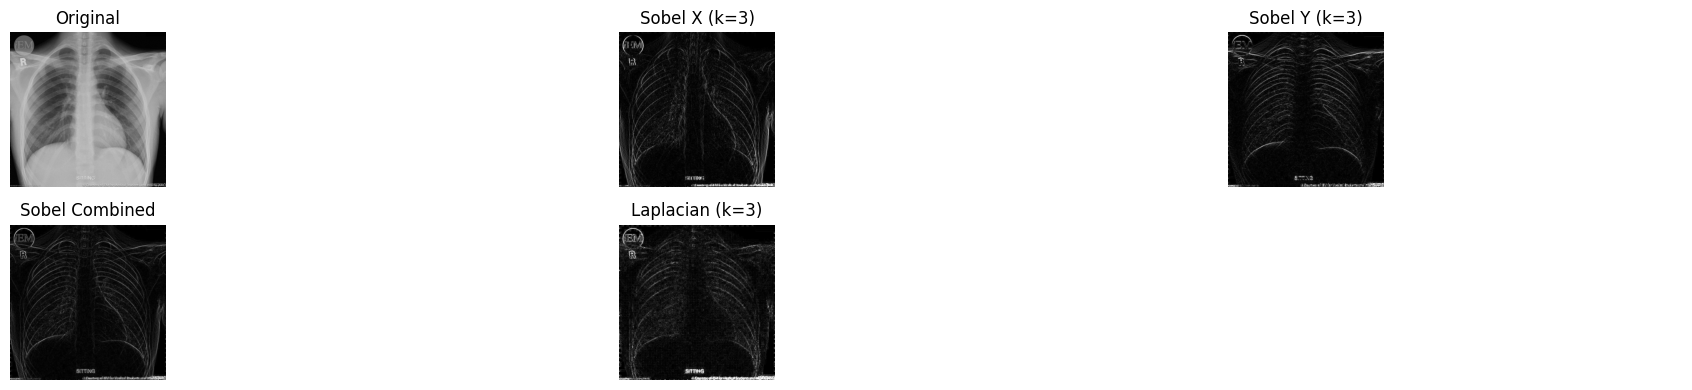

In [ ]:
# --- Exercise 3 Code ---
img_gray = io.imread("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fcharteredphysiotherapy.com%2Fwp-content%2Fuploads%2F2021%2F05%2Fxrays.jpg", as_gray=True)
